In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)


df['target'] = cancer.target

In [4]:
print("Shape of the dataset:", df.shape)
print(df.target.unique())

df.sample(5)

Shape of the dataset: (569, 31)
[0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
253,17.300,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,25.09,130.90,1222.0,0.1416,0.24050,0.33780,0.18570,0.3138,0.08113,0
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178,1
275,11.890,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,0.2015,0.05875,...,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.2220,0.06033,1
355,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,...,22.43,89.02,547.4,0.1096,0.20020,0.23880,0.09265,0.2121,0.07188,1
379,11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,32.82,91.76,508.1,0.2184,0.93790,0.84020,0.25240,0.4154,0.14030,0


In [6]:
X = df.drop(['target'], axis=1)
print("Shape of X:", X.shape)

# y contains target column
y = df['target']
print("Shape of y:", y.shape)

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


Shape of X: (569, 30)
Shape of y: (569,)


In [7]:

# Pipeline with PCA and SVM
clf = Pipeline([
    ("pca",PCA(n_components=0.7)),
    ("svm",SVC(C=10,kernel='rbf')),
])

#Training the data
clf.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=0.7)), ('svm', SVC(C=10))])

In [8]:
print("Score is:",clf.score(X_test,y_test))

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classificaion Report")
print(report)

Score is: 0.8859649122807017
Classificaion Report
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        39
           1       0.88      0.96      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.85      0.87       114
weighted avg       0.89      0.89      0.88       114



[[29 10]
 [ 3 72]]


Text(0.5, 23.52222222222222, 'Predicted')

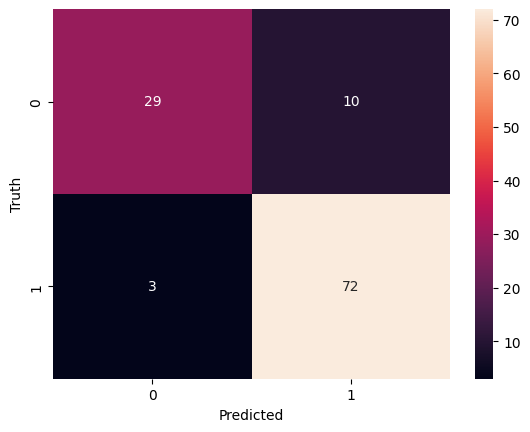

In [9]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predicted")